# 주제 : 골다공증 발생 예측 

## 결과 요약
골다공증은 '40대부터 ~ 90대' 노년층에서 많이 발생한다는 것을 확인할 수 있었습니다. 다양한 머신러닝 모델 중 Gradient Boosting Classifier, XGBClassifier, K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, MLP Classifier, RandomForestClassifier, Decision Tree 를 이용하여 성능을 비교한 결과, 8가지 모델 중 Gradient Boosting Classifier, XGBClassifier 모델이 정확도 약 91%로 골다공증 발생 예측에 효과적임을 확인하였습니다


## 활용 분야
- 보험 분야:  보험 회사가 골다공증 관련 보험 상품의 가격을 책정하거나, 골다공증 발생 위험을 평가하는 데 도움이 될 수 있습니다.


## 기대 효과
- 보험 서비스 개선: 보험 회사는 고객에게 더 정확하고 공정한 보험료를 제공할 수 있습니다. 이는 고객 만족도를 높이고, 보험 회사의 경쟁력을 향상시킬 수 있습니다.


## 개요
골다공증 발생 요인이 어떤 특성과 상대적으로 높은 상관관계를 가지는지를 알아보고
다양한 머신러닝 모델 Gradient Boosting Classifier, K-Nearest Neighbors,  Support Vector Classifier, Logistic Regression, MLP Classifier, Decision Tree, XGBClassifier 별 성능을 비교해보고 가장 적합한 모델이 무엇인지 알아보고자 합니다.


## 도구
이 프로젝트에는 다음 Python 라이브러리가 사용되었습니다.

- Pandas: 데이터 분석용
- Seaborn: 데이터 시각화용
- Matplotlib: 데이터 시각화용
- Numpy: 수학 방정식용
- Sklearn: 데이터 인코딩, 모델링용, 정규화용
- XGBClassifier: 모델링용
- Warnings: 경고 메시지 무시용


##  진행 순서

### 데이터 분석
1. 데이터 정보 확인

### 데이터 전처리
1. 데이터 정제(Data Cleaning)
    - 누락값(Missing Values) 수정 : 데이터 완전성을 유지 
    - 이상치(Outliers) 수정 : 분석의 정확성 향상
1. Feature Engineering
    - 레이블 인코딩(Encoding) : 범주형 변수를 숫자 형태로 맵핑
    - '나이' 구간화(Binning) 
1. 특성 변형(Data Transformation)
    - 스케일링(Scaling) :  정규화(Normalization)

### 상관관계 시각화
- 특성별 분포 비교 : 히스토그램
- 특성별 골다공증 발생 빈도를 중심으로 상관관계 비교 : 히트맵
- 나이를 구간값에 따라 분류하여 골다공증 발생 분포 비교 : 히트맵

### 모델링
1. 모델별 성능 비교 
    - Gradient Boosting Classifier
    - K-Nearest Neighbors
    - Support Vector Classifier
    - Logistic Regression
    - MLP Classifier
    - Decision Tree 
    - RandomForestClassifier
    - XGBClassifier
1. GridSearchCV 최적의 하이퍼파라미터 검색
1. 모델 선택
1. 모델별 학습, 예측, 평가 진행
  
## 참고

https://www.kaggle.com/code/theoneandonlyp/90-82-osteoporosis-risk-prediction

https://www.kaggle.com/code/docxian/osteoporosis-risk-prediction


## 데이터 정보 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('osteoporosis.csv')

df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [3]:
print(df.info())

# 칼슘섭취  Calcium Intake
# 비타민 D섭취  Vitamin D Intake
# 나이 Age        
# 성별 Gender               
# 호르몬변화 Hormonal Changes
# 유전 Family History 
# 인종/민종 Race/Ethnicity
# 체중 Body Weight  
# 신체활동 Physical Activity
# 흡연 Smoking
# 알코올 소비 Alcohol Consumption
# 질병 Medical Conditions
# 약물 Medications
# 이전골절 Prior Fractures
# 골다공증 발생 여부 Osteoporosis         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [4]:
binary_features = []
categorical_features = []

for col in df.columns:
    #'Id' 와'Age' 열은 pass
    if col not in ['Id', 'Age']:
        unique_values_count = df[col].nunique(dropna=False)
        
        print(f"{col} : {unique_values_count}")

        if unique_values_count == 2:
            binary_features.append(col)
            
        elif unique_values_count > 2:
            categorical_features.append(col)
            
        unique_values = df[col].unique()
        print(f" {unique_values}")

print()
print("Binary Columns:", binary_features)
print()
print("Categorical Columns:", categorical_features)

Gender : 2
 ['Female' 'Male']
Hormonal Changes : 2
 ['Normal' 'Postmenopausal']
Family History : 2
 ['Yes' 'No']
Race/Ethnicity : 3
 ['Asian' 'Caucasian' 'African American']
Body Weight : 2
 ['Underweight' 'Normal']
Calcium Intake : 2
 ['Low' 'Adequate']
Vitamin D Intake : 2
 ['Sufficient' 'Insufficient']
Physical Activity : 2
 ['Sedentary' 'Active']
Smoking : 2
 ['Yes' 'No']
Alcohol Consumption : 2
 ['Moderate' nan]
Medical Conditions : 3
 ['Rheumatoid Arthritis' nan 'Hyperthyroidism']
Medications : 2
 ['Corticosteroids' nan]
Prior Fractures : 2
 ['Yes' 'No']
Osteoporosis : 2
 [1 0]

Binary Columns: ['Gender', 'Hormonal Changes', 'Family History', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medications', 'Prior Fractures', 'Osteoporosis']

Categorical Columns: ['Race/Ethnicity', 'Medical Conditions']


## 전처리 - 결측치 수정

In [5]:
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [6]:
# 결측치는 '없음'으로 수정 
df['Alcohol Consumption'].fillna(value='None', inplace=True)
df['Medical Conditions'].fillna(value='None', inplace=True)
df['Medications'].fillna(value='None', inplace=True)

In [7]:
df.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

## 상관관계 시각화

In [8]:
# 플롯
import matplotlib.pyplot as plt
import seaborn as sns

### 나이 분포 비교

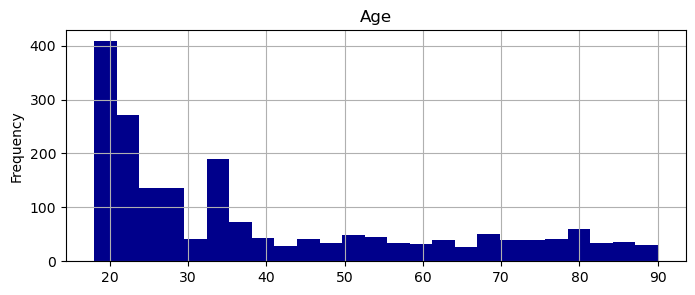

In [9]:
plt.figure(figsize=(8,3))
df['Age'].plot(kind='hist', bins=25, color='darkblue')
plt.title('Age')
plt.grid()
plt.show()

💡전체 1960명의 데이터 중 20대 젊은 층의 분포가 가장 높다

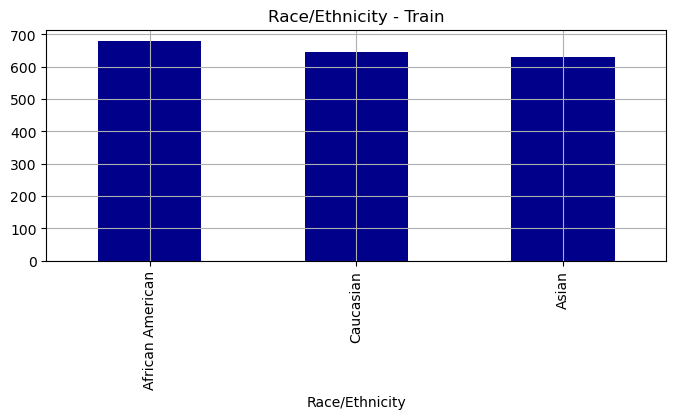

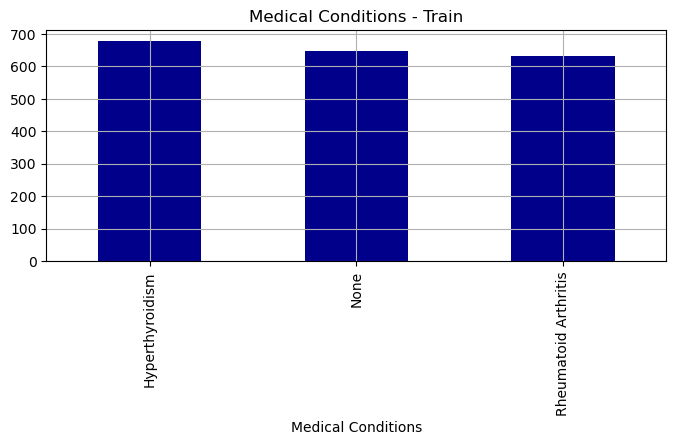

In [10]:
# 범주형 특성 분포 비교
for f in categorical_features:
    plt.figure(figsize=(8,3))
    df[f].value_counts().plot(kind='bar', color='darkblue')
    plt.title(f + ' - Train')
    plt.grid()

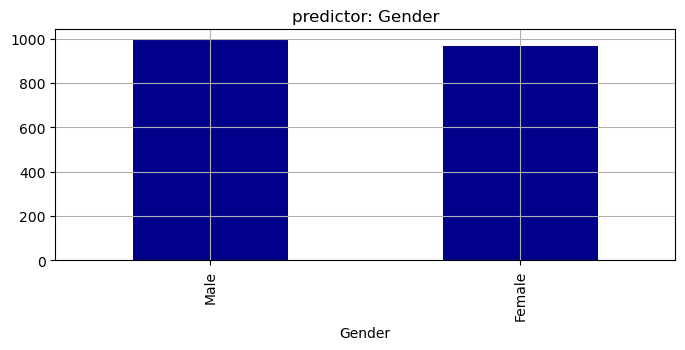

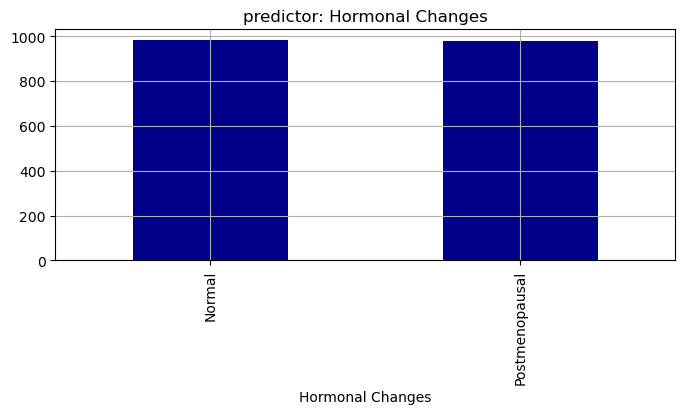

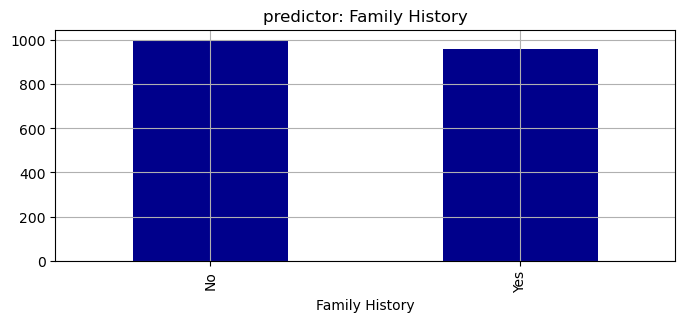

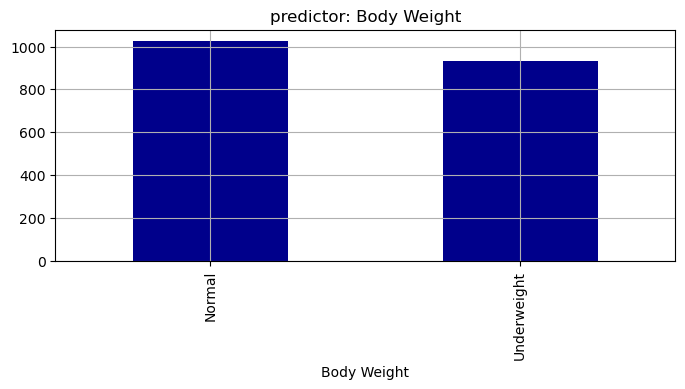

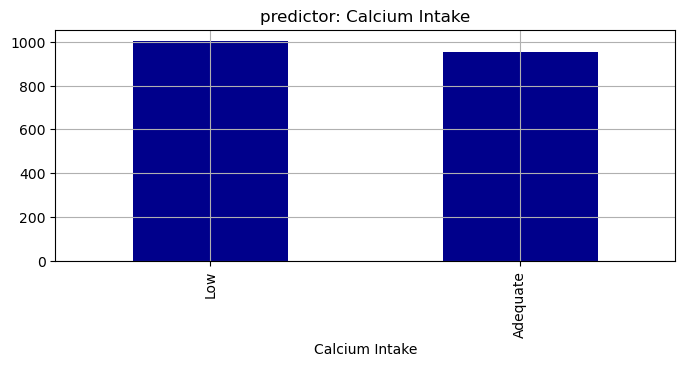

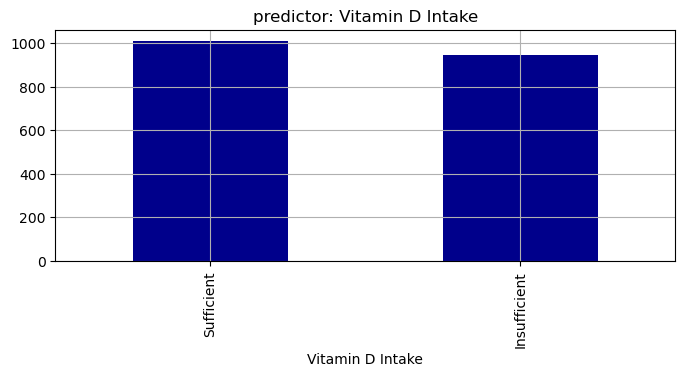

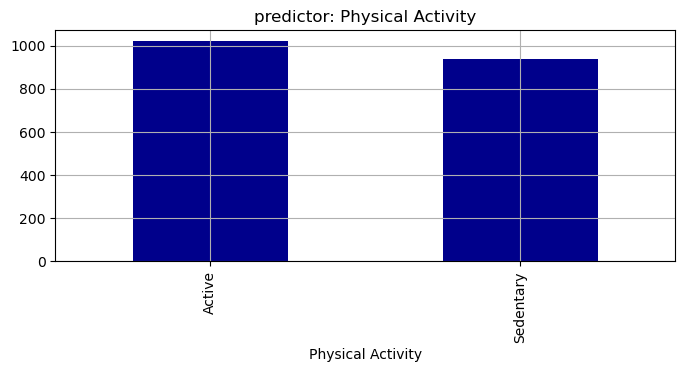

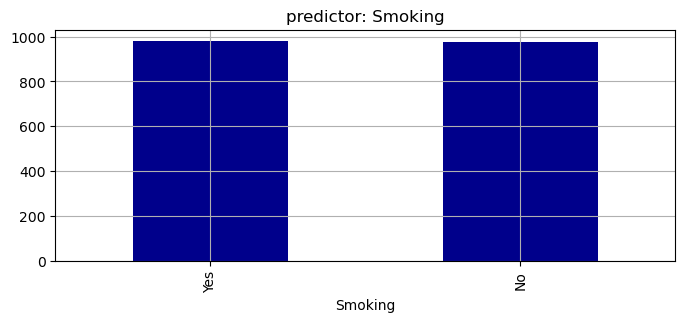

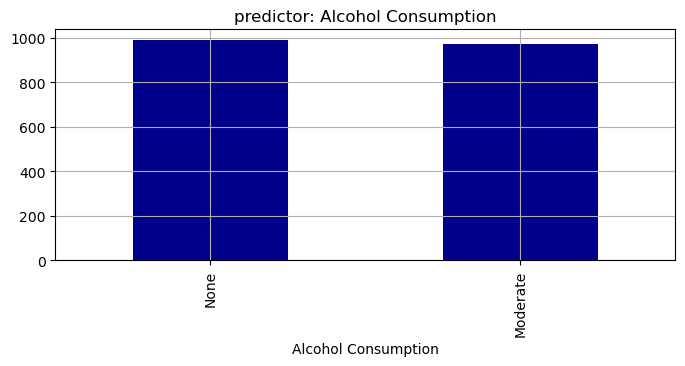

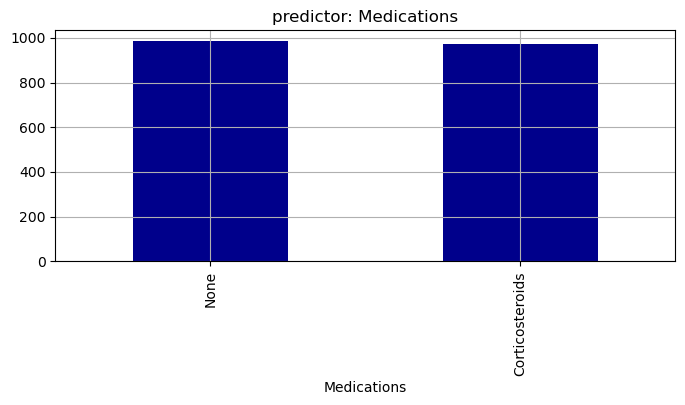

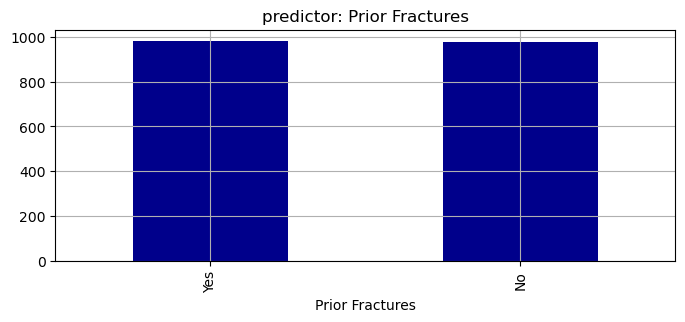

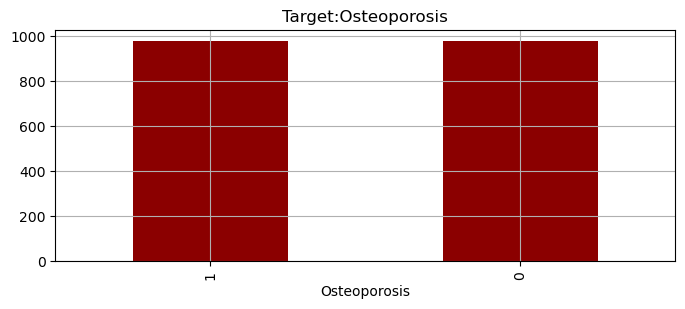

In [11]:
# 이진형 특성 분포 비교
for f in binary_features:
    plt.figure(figsize=(8,3))
    
    plot_name = 'predictor: '+ f
    default_color = 'darkblue'
    if f == 'Osteoporosis' : 
        default_color = 'darkred'
        plot_name ='Target:' + f
        
    df[f].value_counts().plot(kind='bar', color=default_color)
    plt.title(plot_name)
    plt.grid()

💡 타겟 특성의 균형이 잘 잡힌 데이터셋이다

In [12]:
df['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

In [13]:
# 예측 변수, 타겟 변수 저장
predictors = [c for c in df.columns if c not in ['Id', 'Osteoporosis']]
target = 'Osteoporosis'
print(f'예측 변수 {len(predictors)}개', )
print()
print(f'예측 변수: {predictors}')
print()
print(f'타겟 변수: {target}')

예측 변수 14개

예측 변수: ['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']

타겟 변수: Osteoporosis


### 특성별  골다공증 발생 분포 비교

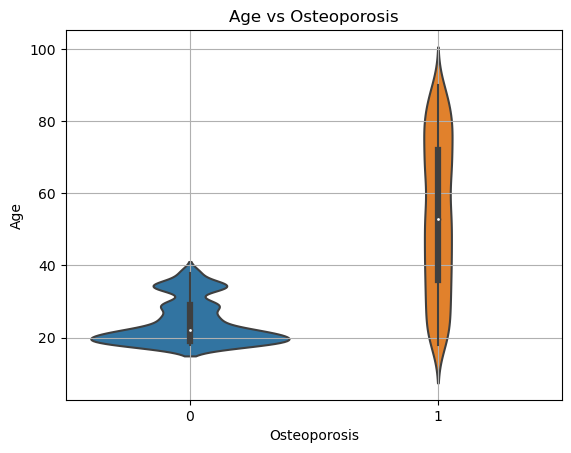

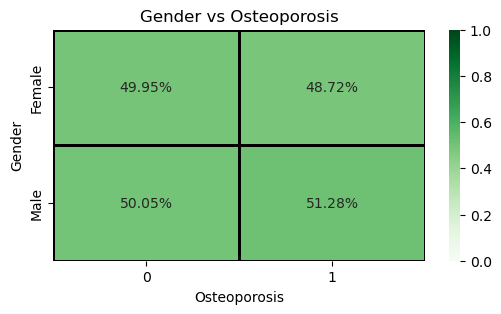

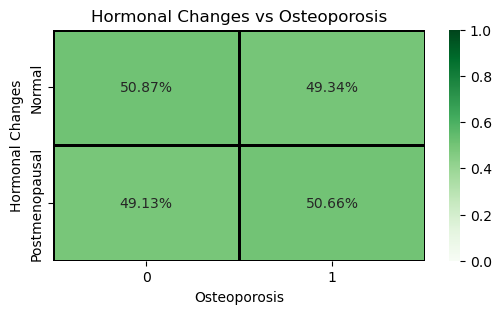

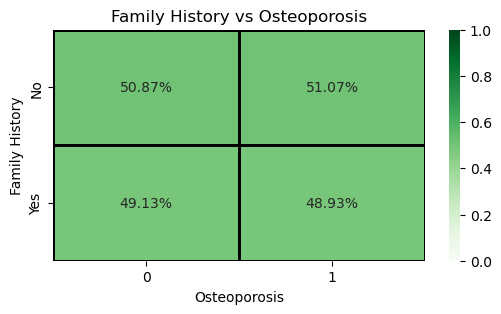

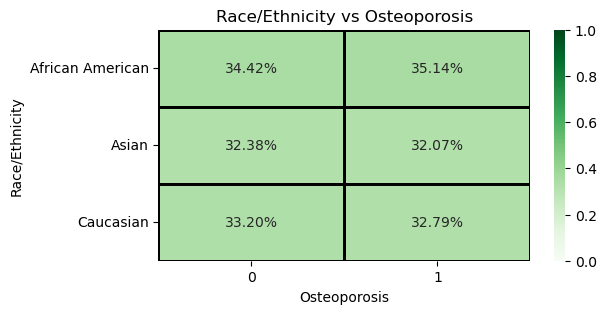

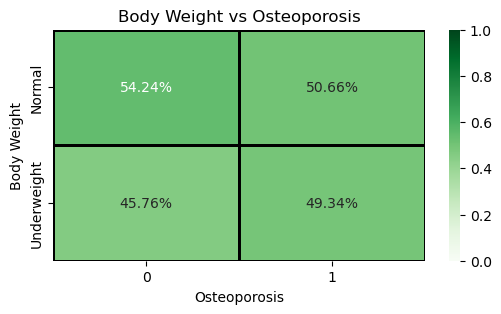

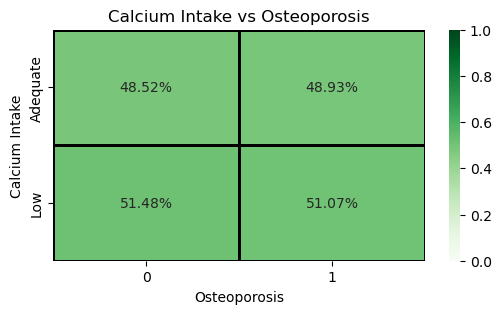

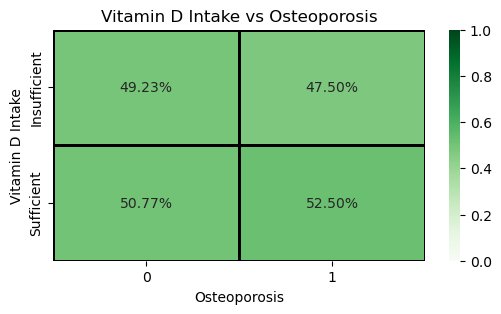

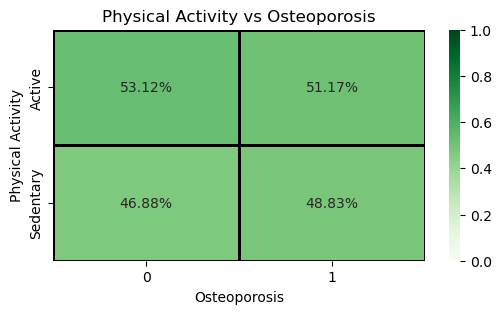

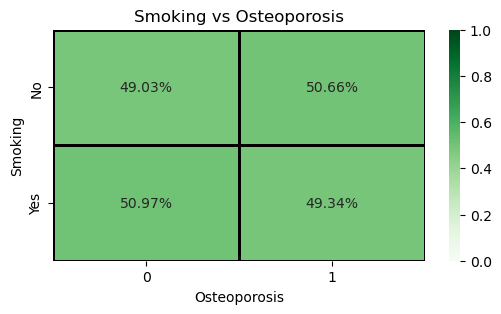

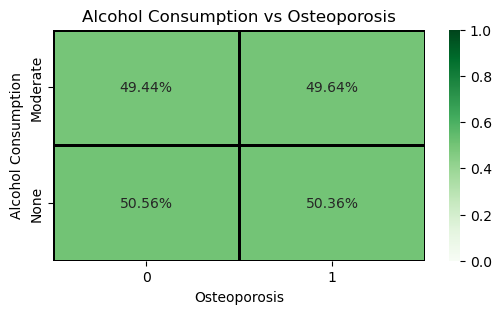

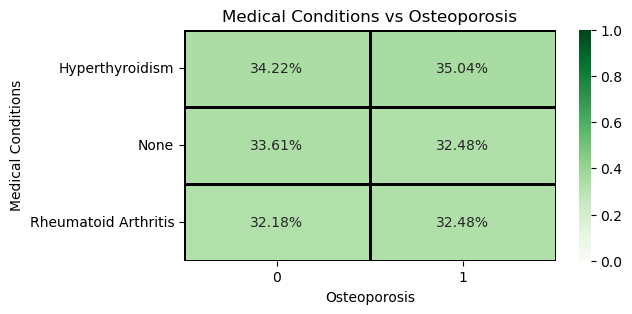

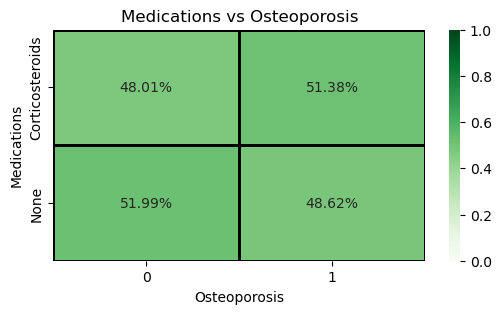

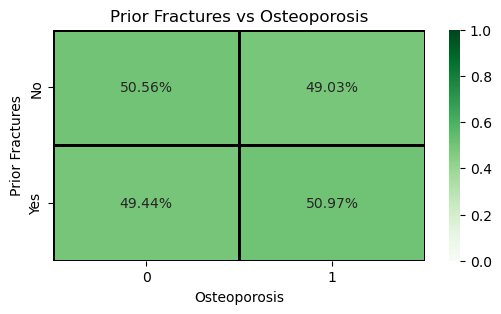

In [14]:
for c in predictors:
    if (c == 'Age'):
        sns.violinplot(data=df, x=target, y=c)
        plt.title(c + ' vs '  + target)
        plt.grid()
        plt.show()
    else:
        ctab = pd.crosstab(df[c],df[target])  # 각 특성별 골다공증 발생 비교
        ctab_norm = ctab / ctab.sum() # 각 특성별 골다공증 발생 비율 비교
        plt.figure(figsize=(6,3))
        g = sns.heatmap(ctab_norm, annot=True,
                        fmt='.2%', linecolor='black',
                        linewidths=1,
                        cmap='Greens', 
                        vmin=0, vmax=+1)
        plt.title(c + ' vs '  + target)
        plt.show()

💡골다공증 발생에 주요 동인은 '나이'이다.

💡다른 범주형 특성들은 타겟 변수에 큰 영향을 미치지 않는다.

### '나이' 구간별 골다공증 발생 비교

In [15]:
# 최소, 최대, 4분위 수 확인
df['Age'].describe()

count    1958.000000
mean       39.101124
std        21.355424
min        18.000000
25%        21.000000
50%        32.000000
75%        53.000000
max        90.000000
Name: Age, dtype: float64

## 전처리 : '나이' 구간화

In [16]:
# 구간화
df['Age_bin'] = pd.cut(df.Age,[18,20,25,30,35,40,45,55,65,75,80,90])

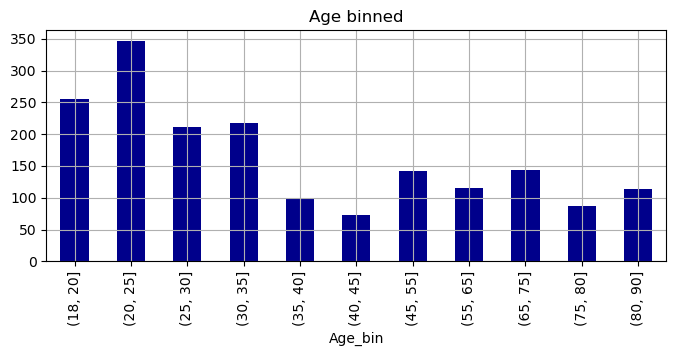

In [17]:
# 나이 구간별 분포 
plt.figure(figsize=(8,3))
df.Age_bin.value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('Age binned')
plt.grid()
plt.show()

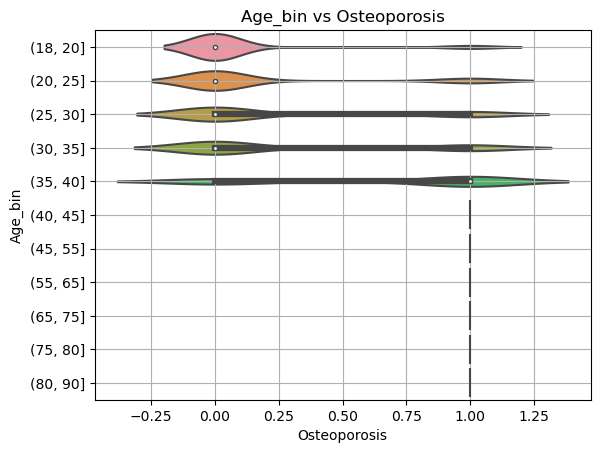

In [18]:
c = 'Age_bin'
sns.violinplot(data=df, x=target, y=c)
plt.title(c + ' vs '  + target)
plt.grid()
plt.show()

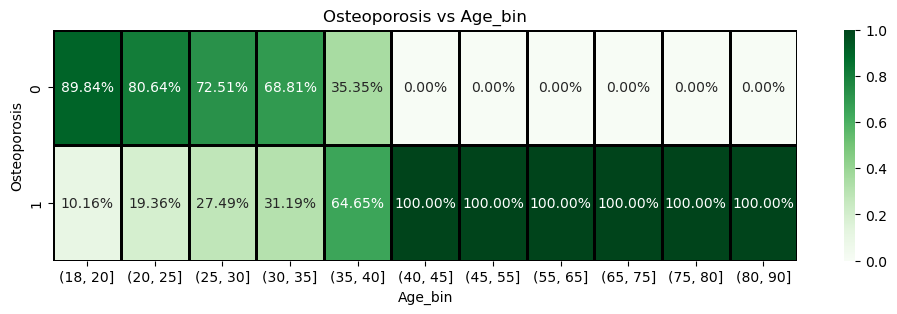

In [19]:
# 나이 구간별 골다공증 발생 분포
c = 'Age_bin'
ctab = pd.crosstab(df[target],df[c])
ctab_norm = ctab / ctab.sum() # 나이 구간별 타겟 발생 비율 비교

plt.figure(figsize=(12,3))
g = sns.heatmap(ctab_norm, annot=True,
                fmt='.2%', linecolor='black',
                linewidths=1,
                cmap='Greens', 
                vmin=0, vmax=+1)
plt.title('Osteoporosis vs ' + c)
plt.show()

💡골다공증 위험은 젊을수록 낮다.

💡 골다공증은 '40대부터 ~ 90대' 노년층에서 발생 위험이 높음을 알 수 있다.

## 전처리 - 문자형 컬럼 레이블 인코딩

In [20]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 숫자 형식으로 인코딩 
text_column = [c for c in df.columns if c not in ['Id', 'Osteoporosis','Age']]
for c in text_column:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])

df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis,Age_bin
0,104866,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1,8
1,101999,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1,3
2,106567,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1,10
3,102316,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1,9
4,101944,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1,4


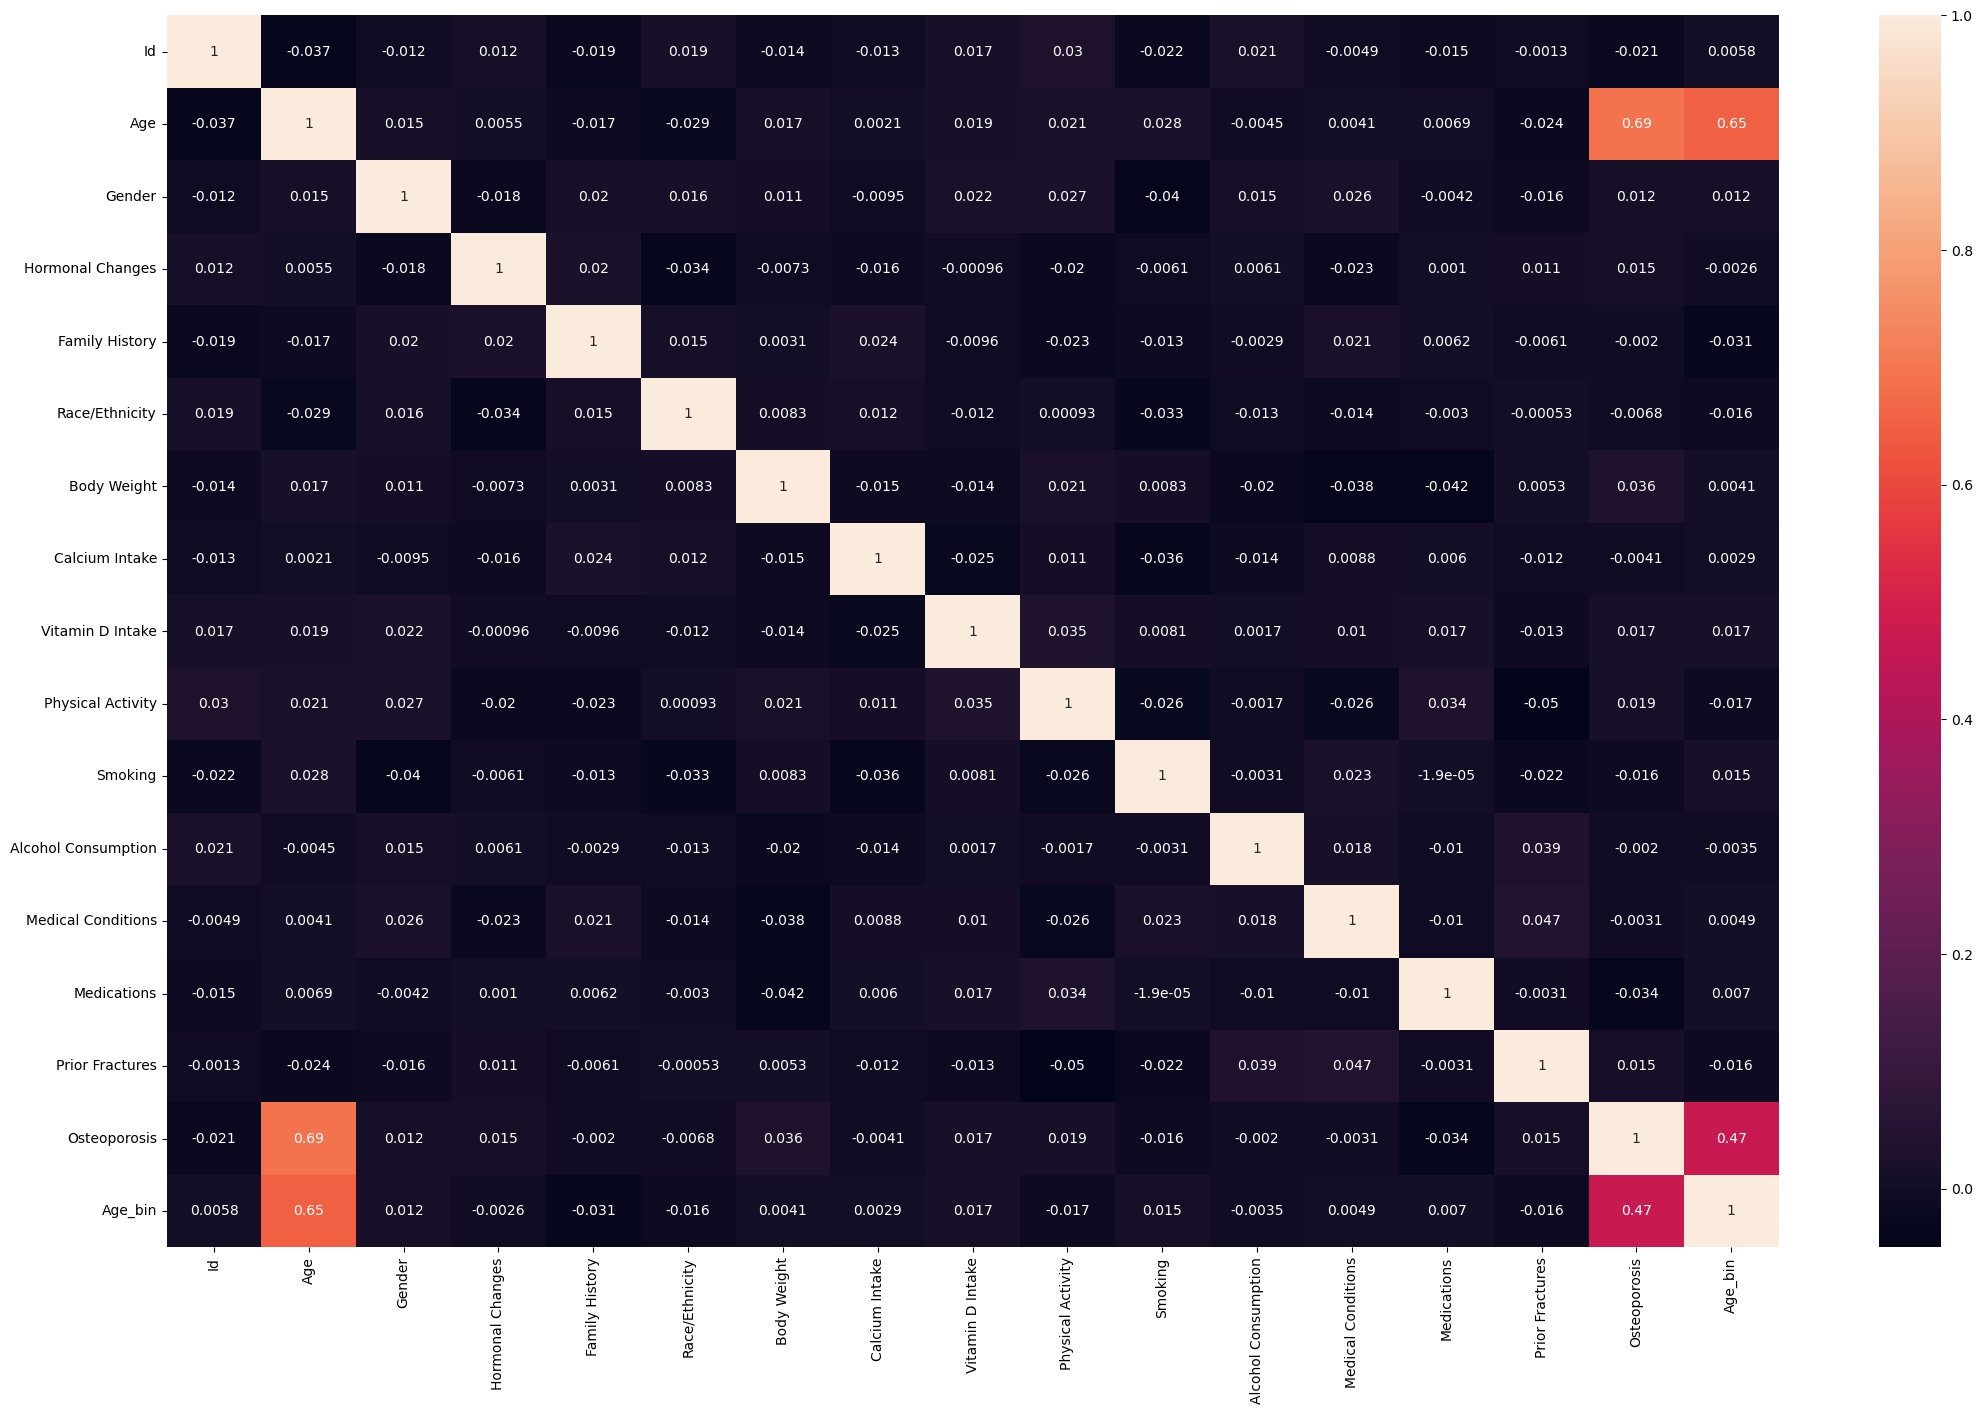

출력끝


In [21]:
#데이터 시각화
import seaborn as sns

# sns.set(font_scale=1.2)
plt.figure(figsize = (26,16))  # 가로 10 인치, 세로6인치 히트맵 생성 

# 상관계수 히트맵
sns.heatmap(data=df.corr(), annot=True, cbar=True)
plt.show()
print("출력끝")

## 전처리 - 데이터 정규화

In [22]:
from sklearn.preprocessing import StandardScaler # 정규화

In [57]:
df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis,Age_bin
0,104866,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1,8
1,101999,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1,3
2,106567,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1,10
3,102316,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1,9
4,101944,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,0,0,1,0,0,0,1,1,1,0,2,1,1,0,0
1954,106463,23,0,1,1,2,1,1,0,0,0,1,1,0,0,0,1
1955,103142,34,0,1,0,0,1,1,1,1,0,1,0,1,0,0,3
1956,105187,25,1,1,0,0,0,1,0,1,1,1,2,0,1,0,1


In [62]:
# 타겟과 특성 컬럼 분리
features =  df[[c for c in df.columns if c not in [ 'Id','Osteoporosis']]]
label = df['Osteoporosis']

print(f"{features.columns}")
print(f"{label.shape}")

Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Age_bin'],
      dtype='object')
(1958,)


In [63]:
features

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Age_bin
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,8
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,3
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,10
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,9
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,0,1,0,0,0,1,1,1,0,2,1,1,0
1954,23,0,1,1,2,1,1,0,0,0,1,1,0,0,1
1955,34,0,1,0,0,1,1,1,1,0,1,0,1,0,3
1956,25,1,1,0,0,0,1,0,1,1,1,2,0,1,1


In [64]:
scaler = StandardScaler()
scaler.fit(features)  # 데이터 정규화를 위해 StandardScaler 를 입력 데이터에 맞춰주겠다 

StandardScaler()

In [66]:
features_scaled = scaler.transform(features) # 입력데이터를 정규화해서 변환
features_scaled
# 정규화 된 데이터
# 각 행은 하나의 데이터 포인트
# 각 열은 해당 데이터 포인트의 특성
# 모든 특성이 평균이 0, 표준편차 1로 표준화


# 정규화된 값을 데이터 프레임으로 변환
features = pd.DataFrame(features_scaled)
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.400418,-1.013368,-0.997959,1.019600,0.021718,1.050293,0.974782,0.967831,1.043862,0.996940,-1.009236,1.250675,-1.006148,0.995923,0.996825
1,-0.332606,-1.013368,-0.997959,1.019600,0.021718,1.050293,0.974782,0.967831,1.043862,-1.003069,0.990849,0.028098,0.993890,0.995923,-0.383503
2,2.337187,-1.013368,1.002045,-0.980777,1.236710,-0.952115,-1.025871,0.967831,-0.957981,-1.003069,-1.009236,-1.194479,-1.006148,-1.004094,1.548955
3,1.821964,-1.013368,-0.997959,-0.980777,1.236710,1.050293,-1.025871,-1.033239,1.043862,0.996940,0.990849,1.250675,-1.006148,-1.004094,1.272890
4,-0.051575,0.986808,1.002045,1.019600,-1.193273,-0.952115,0.974782,0.967831,-0.957981,0.996940,0.990849,1.250675,0.993890,0.995923,-0.107437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,-0.941506,-1.013368,-0.997959,1.019600,-1.193273,-0.952115,-1.025871,0.967831,1.043862,0.996940,-1.009236,1.250675,0.993890,0.995923,-1.211699
1954,-0.754152,-1.013368,1.002045,1.019600,1.236710,1.050293,0.974782,-1.033239,-0.957981,-1.003069,0.990849,0.028098,-1.006148,-1.004094,-0.935633
1955,-0.238929,-1.013368,1.002045,-0.980777,-1.193273,1.050293,0.974782,0.967831,1.043862,-1.003069,0.990849,-1.194479,0.993890,-1.004094,-0.383503
1956,-0.660475,0.986808,1.002045,-0.980777,-1.193273,-0.952115,0.974782,-1.033239,1.043862,0.996940,0.990849,1.250675,-1.006148,0.995923,-0.935633


In [67]:
# 컬럼명 변경
# features.columns = ['Age','Gender','Hormonal Changes','Family History','Race/Ethnicity','Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity','Smoking','Alcohol Consumption','Medical Conditions','Medications','Prior Fractures']
features.columns = ['Age','Gender','Hormonal Changes','Family History','Race/Ethnicity','Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity','Smoking','Alcohol Consumption','Medical Conditions','Medications','Prior Fractures','Age_bin']
features

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Age_bin
0,1.400418,-1.013368,-0.997959,1.019600,0.021718,1.050293,0.974782,0.967831,1.043862,0.996940,-1.009236,1.250675,-1.006148,0.995923,0.996825
1,-0.332606,-1.013368,-0.997959,1.019600,0.021718,1.050293,0.974782,0.967831,1.043862,-1.003069,0.990849,0.028098,0.993890,0.995923,-0.383503
2,2.337187,-1.013368,1.002045,-0.980777,1.236710,-0.952115,-1.025871,0.967831,-0.957981,-1.003069,-1.009236,-1.194479,-1.006148,-1.004094,1.548955
3,1.821964,-1.013368,-0.997959,-0.980777,1.236710,1.050293,-1.025871,-1.033239,1.043862,0.996940,0.990849,1.250675,-1.006148,-1.004094,1.272890
4,-0.051575,0.986808,1.002045,1.019600,-1.193273,-0.952115,0.974782,0.967831,-0.957981,0.996940,0.990849,1.250675,0.993890,0.995923,-0.107437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,-0.941506,-1.013368,-0.997959,1.019600,-1.193273,-0.952115,-1.025871,0.967831,1.043862,0.996940,-1.009236,1.250675,0.993890,0.995923,-1.211699
1954,-0.754152,-1.013368,1.002045,1.019600,1.236710,1.050293,0.974782,-1.033239,-0.957981,-1.003069,0.990849,0.028098,-1.006148,-1.004094,-0.935633
1955,-0.238929,-1.013368,1.002045,-0.980777,-1.193273,1.050293,0.974782,0.967831,1.043862,-1.003069,0.990849,-1.194479,0.993890,-1.004094,-0.383503
1956,-0.660475,0.986808,1.002045,-0.980777,-1.193273,-0.952115,0.974782,-1.033239,1.043862,0.996940,0.990849,1.250675,-1.006148,0.995923,-0.935633


In [68]:
# 특성 중 타겟 특성에 가장 큰 영향을 주는 'Age', 'Age_bin' 특성으로 모델 성능 예측
# features = features[[c for c in features.columns if c in [ 'Age','Age_bin']]]
# features = features[[c for c in features.columns if c in [ 'Age','Age_bin']]]
features

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Age_bin
0,1.400418,-1.013368,-0.997959,1.019600,0.021718,1.050293,0.974782,0.967831,1.043862,0.996940,-1.009236,1.250675,-1.006148,0.995923,0.996825
1,-0.332606,-1.013368,-0.997959,1.019600,0.021718,1.050293,0.974782,0.967831,1.043862,-1.003069,0.990849,0.028098,0.993890,0.995923,-0.383503
2,2.337187,-1.013368,1.002045,-0.980777,1.236710,-0.952115,-1.025871,0.967831,-0.957981,-1.003069,-1.009236,-1.194479,-1.006148,-1.004094,1.548955
3,1.821964,-1.013368,-0.997959,-0.980777,1.236710,1.050293,-1.025871,-1.033239,1.043862,0.996940,0.990849,1.250675,-1.006148,-1.004094,1.272890
4,-0.051575,0.986808,1.002045,1.019600,-1.193273,-0.952115,0.974782,0.967831,-0.957981,0.996940,0.990849,1.250675,0.993890,0.995923,-0.107437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,-0.941506,-1.013368,-0.997959,1.019600,-1.193273,-0.952115,-1.025871,0.967831,1.043862,0.996940,-1.009236,1.250675,0.993890,0.995923,-1.211699
1954,-0.754152,-1.013368,1.002045,1.019600,1.236710,1.050293,0.974782,-1.033239,-0.957981,-1.003069,0.990849,0.028098,-1.006148,-1.004094,-0.935633
1955,-0.238929,-1.013368,1.002045,-0.980777,-1.193273,1.050293,0.974782,0.967831,1.043862,-1.003069,0.990849,-1.194479,0.993890,-1.004094,-0.383503
1956,-0.660475,0.986808,1.002045,-0.980777,-1.193273,-0.952115,0.974782,-1.033239,1.043862,0.996940,0.990849,1.250675,-1.006148,0.995923,-0.935633


## 모델링

In [69]:
# 알고리즘
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 검증
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

# 연산
import numpy as np

# 경고 무시
import warnings
warnings.filterwarnings("ignore")

In [70]:
# 비교할 모델 목록 정의 
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier" : XGBClassifier()
}

## 모델별 성능 비교 - n번 교차검증

In [71]:
for name, model in models.items():
    scoring = ["accuracy", "precision_macro", "f1_macro"]
    result = cross_validate(model, features, label, scoring=scoring, cv=3)
    score = result['test_accuracy']
    mean = np.round(np.mean(score),2)
    
    print(f"{name} 성능: {mean}")
    print()
         

Logistic Regression 성능: 0.83

Decision Tree 성능: 0.82

Support Vector Classifier 성능: 0.84

Gradient Boosting Classifier 성능: 0.91

K-Nearest Neighbors 성능: 0.74

MLP Classifier 성능: 0.81

RandomForestClassifier 성능: 0.85

XGBClassifier 성능: 0.88



## 모델별 최적화 하이퍼 파라미터 검색 - GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# 모델별 최적화 하이퍼파라미터 정의
param_grid = {
    "Logistic Regression": {"C": [0.001, 0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {"max_depth": [None, 2, 4, 6, 8, 10]},
    "Support Vector Classifier": {"C": [0.001, 0.01, 0.1, 1, 10, 100]},
    "Gradient Boosting Classifier": {"n_estimators": [100, 500, 800], "learning_rate": [0.01, 0.1, 1]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9]},
    "MLP Classifier": {"hidden_layer_sizes": [(50,), (100,), (200,)], "alpha": [0.0001, 0.001, 0.01, 0.1]},
    "RandomForestClassifier": {"n_estimators": [50, 100, 200], "max_depth": [None, 2, 4, 6, 8, 10]},
    "XGBClassifier":{"n_estimators": [300, 500, 800], "learning_rate": [0.01, 0.1, 1],"max_depth": [3, 4, 5, 6, 8, 10] }

}

In [56]:
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(features, label)
    
    print(f"{name} 최적의 하이퍼파라미터: {grid_search.best_params_}")
    print()
    print(f"{name} 최적의 성능: {np.round(grid_search.best_score_,3)}")
    print()

Logistic Regression 최적의 하이퍼파라미터: {'C': 0.001}

Logistic Regression 최적의 성능: 0.859

Decision Tree 최적의 하이퍼파라미터: {'max_depth': None}

Decision Tree 최적의 성능: 0.914

Support Vector Classifier 최적의 하이퍼파라미터: {'C': 10}

Support Vector Classifier 최적의 성능: 0.859

Gradient Boosting Classifier 최적의 하이퍼파라미터: {'learning_rate': 0.01, 'n_estimators': 500}

Gradient Boosting Classifier 최적의 성능: 0.914

K-Nearest Neighbors 최적의 하이퍼파라미터: {'n_neighbors': 7}

K-Nearest Neighbors 최적의 성능: 0.564

MLP Classifier 최적의 하이퍼파라미터: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}

MLP Classifier 최적의 성능: 0.858

RandomForestClassifier 최적의 하이퍼파라미터: {'max_depth': None, 'n_estimators': 50}

RandomForestClassifier 최적의 성능: 0.914

XGBClassifier 최적의 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800}

XGBClassifier 최적의 성능: 0.914



💡8가지 모델 중  **Decision Tree,  Gradient Boosting Classifie,XGBClassifier, RandomForestClassifier** 모델이 91%로 **골다공증 발생 예측에 효과적임**을 확인하였습니다.

In [76]:
models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=800, learning_rate=0.01),
    "XGBClassifier" : XGBClassifier(n_estimators=800, learning_rate=0.01, max_depth= 3),
    "Decision Tree" : DecisionTreeClassifier(max_depth=None),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=50, max_depth=None)
}

In [77]:
for name, model in models.items():
    scoring = ["accuracy", "precision_macro", "f1_macro"]
    result = cross_validate(model, features, label, scoring=scoring, cv=3)
    score = result['test_accuracy']
    mean = np.round(np.mean(score),3)
    
    print(f"{name} 예측 성능: {mean}")
    print()
        

Gradient Boosting Classifier 예측 성능: 0.913

XGBClassifier 예측 성능: 0.91

Decision Tree 예측 성능: 0.829

RandomForestClassifier 예측 성능: 0.858

